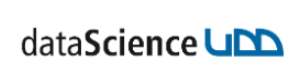

# Tarea n°3: Deep Learning

Profesor: Takeshi Eduardo Asahi Kodama

Alumno: Alejandro Andrés Méndez Miranda



El dataset seleccionado es 60k stack overflow questions with quality rate. Es un problema de clasificación de calidad del posteo en la página de StackOverflow. Para esta tarea se entrega tanto el título, el cuerpo y los tags del post, además de la fecha, ID y las 3 categorías a predecir:

* LQ_CLOSE: Baja calidad cerrado
* LQ_EDIT: Baja calidad editado
* HQ: Alta calidad


El enlace de kaggle al dataset es el siguiente:[link al dataset](https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate)

A continuación realizaremos la lectura y descripción del dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Cargar los datos del set (conjunto) seleccionado. 

In [2]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')

In [3]:
train

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [4]:
valid

,Id,Title,Body,Tags,CreationDate,Y
0,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
1,34554721,Retrieve all except some data of the another t...,I have two table m_master and tbl_appointment\...,<php><mysql><sql><codeigniter><mysqli>,2016-01-01 08:43:50,LQ_EDIT
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,HQ
3,34555448,Reader Always gimme NULL,"I'm so new to C#, I wanna make an application ...",<sql-server><c#-4.0>,2016-01-01 10:43:45,LQ_EDIT
4,34555752,php rearrange array elements based on condition,basically i have this array:\r\n\r\n array(...,<php>,2016-01-01 11:34:09,LQ_EDIT
...,...,...,...,...,...,...
14995,60465681,How can I align two flex boxes to follow each ...,"<p>I have a menu, and I'd like the div.right-c...",<html><css><flexbox>,2020-02-29 13:32:56,LQ_CLOSE
14996,60467932,C++ The correct way to multiply an integer and...,<p>I try to multiply an integer by a double bu...,<c++>,2020-02-29 17:46:41,LQ_CLOSE
14997,60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,*URLS.PY*\r\n //URLS.PY FILE\r\n fro...,<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT
14998,60469392,PHP - getting the content of php page,<p>I have a controller inside which a server i...,<javascript><php><html>,2020-02-29 20:32:14,LQ_CLOSE


# 2) Hacer una breve descripción de estos datos (estadísticas, histogramas, etc.).
# 3) Hacer curación de datos (eliminación de comas y otros caracteres especiales en el caso de texto, recorte 

El dataset  consta de 45000 filas para el set de entrenamiento y 15000 de validación. Tienen 6 columnas comunes:

* Id: Contiene el id del post
* Title: El título con el que se creó el post
* Body: Incluye el texto dentro del cuerpo del post
* Tags: Etiquetas dado al post
* CreationDate: Fecha de creación del post
* Y: Clasificación del post, son 3 categorías: LQ_CLOSE, LQ_EDIT y HQ

In [5]:
a = train["Y"]
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{'HQ': 15000, 'LQ_CLOSE': 15000, 'LQ_EDIT': 15000}

Para cada categoría observamos 15000 datos, es un set balanceado. Otro análisis que se puede realizar es analizar la importancia de lenguajes o tarea según se indica en la columna tag, pero para ello se necesita un pequeño procesado.

In [6]:
train["Tags"] = train['Tags'].str.replace('<','')
train["Tags"] = train['Tags'].str.replace('>',' ')

In [7]:
train.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,java repeat,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,java optional,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,javascript image overlay react-native opacity,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",swift operators whitespace ternary-operator op...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,android material-design floating-action-button,2016-01-01 05:21:48,HQ


In [8]:
flat_list = []
for sublist in np.array(train["Tags"]):
    flat_list.append(sublist.split()[0])

In [9]:
count_list_tag = flat_list
unique, counts = np.unique(count_list_tag, return_counts=True)
tag_df = pd.DataFrame({"tag": unique, "count":counts})
tag_df.sort_values("count", inplace = True, ascending = False )
tag_df = tag_df.iloc[:10,:]
tag_df

,tag,count
622,javascript,5385
950,python,4962
617,java,4641
195,c#,3084
894,php,2759
47,android,2592
198,c++,2204
594,ios,1255
194,c,1234
547,html,888


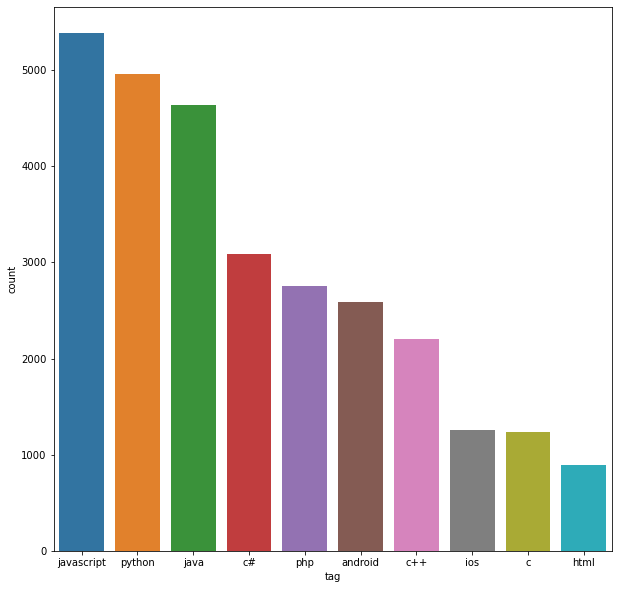

In [10]:
plt.figure(figsize = (10,10))
sns.barplot(x = "tag", y = "count", data = tag_df)
plt.show()

En este dataset el lenguaje más presente es el javascript, python y java. Antes de continuar con otros análisis se hace necesario realizar la limpieza de los datos, que se realizará a continuación.

In [5]:
#Se importa nltk para realizar la limpieza. Para ello se crea una función que luego será aplicada al dataframe
import re
import nltk
from nltk.corpus import stopwords

def remove_stopwords(string):
    word_list = [word.lower() for word in string.split()]
    stopwords_list = list(stopwords.words("english"))
    for word in word_list:
        if word in stopwords_list:
            word_list.remove(word)
    return ' '.join(word_list)

In [6]:
#La limpieza se realiza aplicando distintas funciones de reemplazo (En general símbolos a string vacíos).
#Al finalizar se aplica la limpieza de stopwords

def clean_dataset(train, columns = ["Body", "Title"]):
    for column in ['Body', 'Title']:

        train[column] = train[column].map(lambda x: re.sub('\\n',' ',str(x)))
        train[column] = train[column].map(lambda x: re.sub(r'\W',' ',str(x)))
        train[column] = train[column].map(lambda x: re.sub(r'https\s+|www.\s+',r'', str(x)))
        train[column] = train[column].map(lambda x: re.sub(r'http\s+|www.\s+',r'', str(x)))
        train[column] = train[column].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
        train[column] = train[column].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
        train[column] = train[column].map(lambda x: re.sub(r'\s+',' ',str(x)))
        train[column] = train[column].str.lower()

        train[column] = train[column].map(lambda x: re.sub(r"\’", "\'", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"won\'t", "will not", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"can\'t", "can not", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"don\'t", "do not", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"dont", "do not", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"n\’t", " not", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"n\'t", " not", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\'re", " are", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\'s", " is", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\’d", " would", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\d", " would", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\'ll", " will", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\'t", " not", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\'ve", " have", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\'m", " am", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\n", "", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\r", "", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"[0-9]", "digit", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\'", "", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r"\"", "", str(x)))
        train[column] = train[column].map(lambda x: re.sub(r'[?|!|\'|"|#]',r'', str(x)))
        train[column] = train[column].map(lambda x: re.sub(r'[.|,|)|(|\|/]',r' ', str(x)))
        train[column] = train[column].apply(lambda x: remove_stopwords(x))
        train['description'] = train['Title'] + " " + train['Body']
    return train


In [13]:
train = clean_dataset(train)
valid = clean_dataset(valid)

In [14]:
train.head()

,Id,Title,Body,Tags,CreationDate,Y,description
0,34552656,java repeat task every random seconds,already familiar repeating tasks every seconds...,java repeat,2016-01-01 00:21:59,LQ_CLOSE,java repeat task every random seconds already ...
1,34553034,are java optionals immutable,like understand java would optionals designed ...,java optional,2016-01-01 02:03:20,HQ,are java optionals immutable like understand j...
2,34553174,text overlay image darkened opacity react native,am attempting overlay title an image image dar...,javascript image overlay react-native opacity,2016-01-01 02:48:24,HQ,text overlay image darkened opacity react nati...
3,34553318,ternary operator swift so picky,question very simple just could find answer p ...,swift operators whitespace ternary-operator op...,2016-01-01 03:30:17,HQ,ternary operator swift so picky question very ...
4,34553755,hide show fab scale animation,using custom floatingactionmenu need implement...,android material-design floating-action-button,2016-01-01 05:21:48,HQ,hide show fab scale animation using custom flo...


In [15]:
valid.head()

,Id,Title,Body,Tags,CreationDate,Y,description
0,34552974,to get the child records different tables base...,am would different tables like select system s...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT,to get the child records different tables base...
1,34554721,retrieve except data the another table,have two table m_master tbl_appointment is tbl...,<php><mysql><sql><codeigniter><mysqli>,2016-01-01 08:43:50,LQ_EDIT,retrieve except data the another table have tw...
2,34555135,pandas read_html,trying extract us states wiki url for m using ...,<python><pandas>,2016-01-01 09:55:22,HQ,pandas read_html trying extract us states wiki...
3,34555448,reader always gimme null,so new i wanna make application can easily con...,<sql-server><c#-4.0>,2016-01-01 10:43:45,LQ_EDIT,reader always gimme null so new i wanna make a...
4,34555752,php rearrange array elements based condition,basically array array would would would would ...,<php>,2016-01-01 11:34:09,LQ_EDIT,php rearrange array elements based condition b...


# Palabras más frecuentes según las distintas categorías

In [15]:
from nltk import tokenize

tokenSpace = tokenize.WhitespaceTokenizer()
def counter(text, columnText, quantity):
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = dfFrequency, x = "Word", y = "Frequency", palette="deep")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='horizontal')
    plt.show()

### Categoría LQ_CLOSE

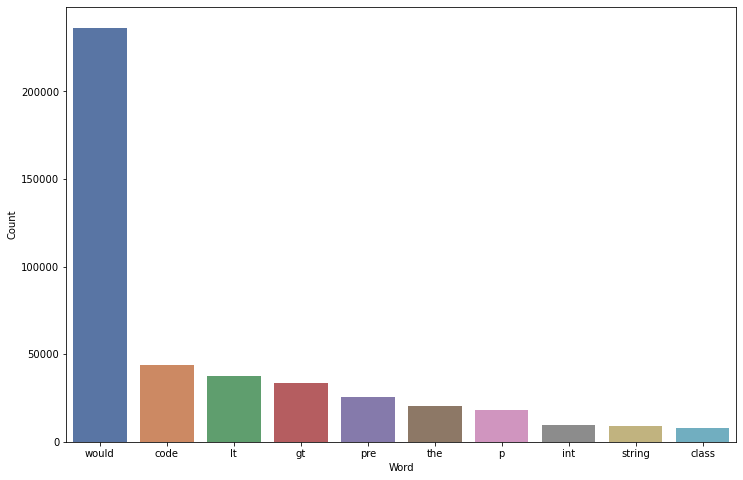

In [16]:
counter(train[train['Y'] == "LQ_CLOSE"], 'description', 10)

### Categoría HQ

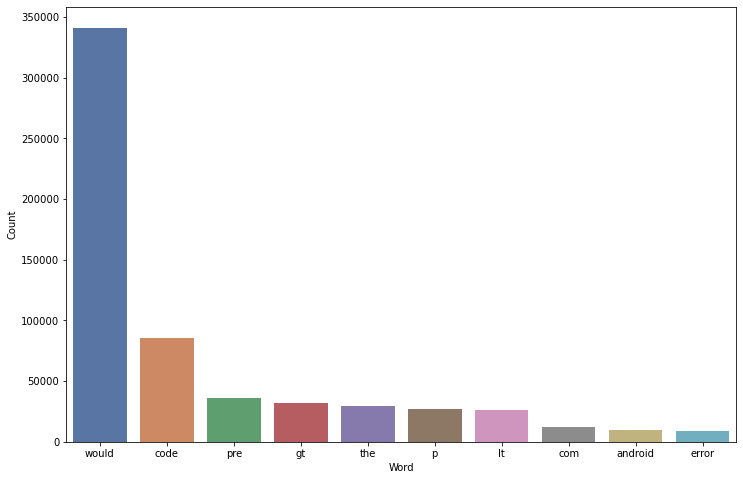

In [17]:
counter(train[train['Y'] == "HQ"], 'description', 10)

 ### Categoría LQ_EDIT

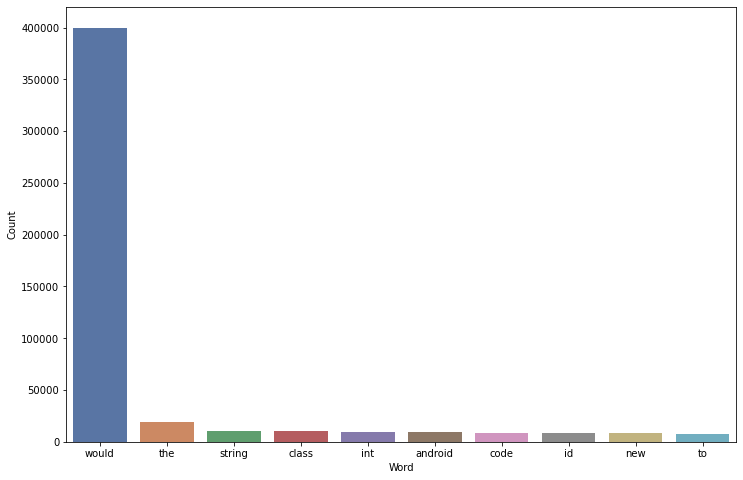

In [18]:
counter(train[train['Y'] == "LQ_EDIT"], 'description', 10)

Luego de la limpieza notamos que por lejos la palabra más utilizada es would, esperable siendo que la mayoría de los post son de consultas.

## Largo promedio de palabra en cada post

Text(0.5, 0.98, 'Average word length in each question')

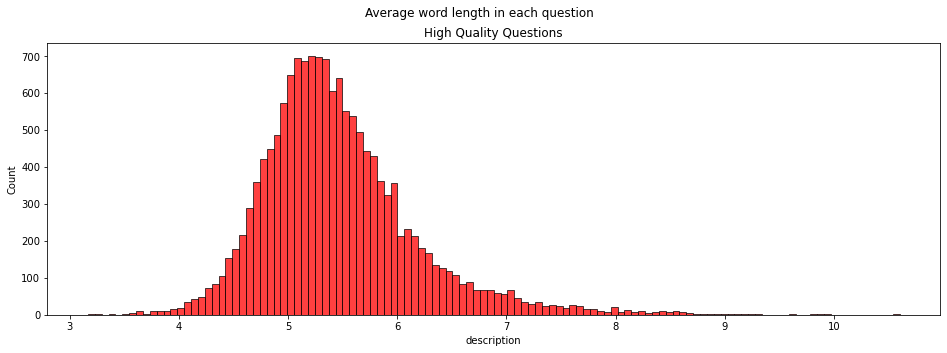

In [19]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[train['Y'] == 'HQ']['description'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax  =  ax1, color = 'red')
ax1.set_title('High Quality Questions')
fig.suptitle('Average word length in each question')

Text(0.5, 0.98, 'Average word length in each question')

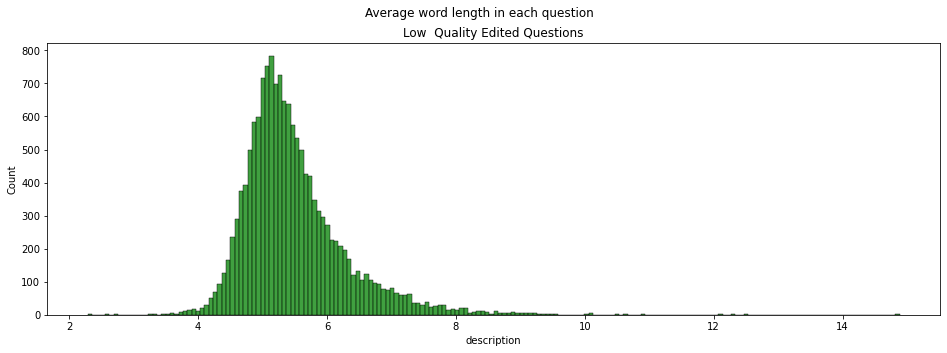

In [20]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[(train['Y'] == 'LQ_EDIT') ]['description'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax  =  ax1, color = 'green')
ax1.set_title('Low  Quality Edited Questions')
fig.suptitle('Average word length in each question')

Text(0.5, 0.98, 'Average word length in each question')

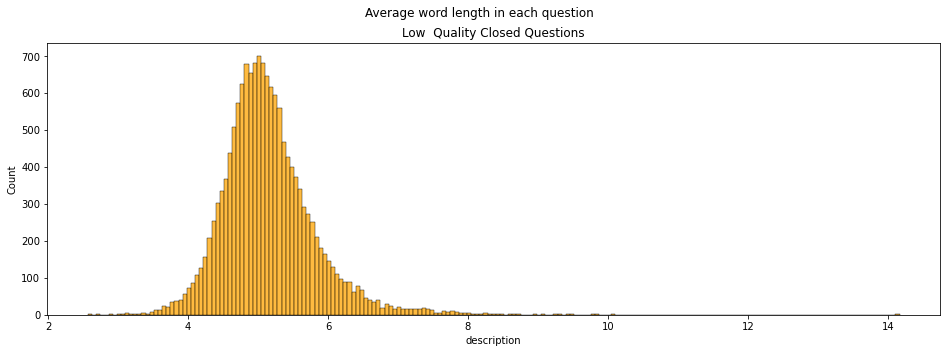

In [21]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[(train['Y'] == 'LQ_CLOSE')]['description'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax  =  ax1, color = 'orange')
ax1.set_title('Low  Quality Closed Questions')
fig.suptitle('Average word length in each question')

## Largo promedio de cada post

Text(0.5, 0.98, 'Average length in each question')

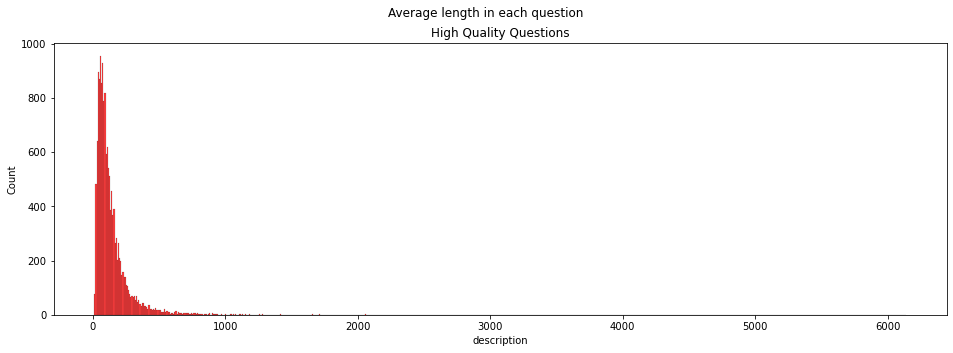

In [22]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[train['Y'] == 'HQ']['description'].str.split().apply(len)
sns.histplot(word,ax  =  ax1, color = 'red')
ax1.set_title('High Quality Questions')
fig.suptitle('Average length in each question')

Text(0.5, 0.98, 'Average length in each question')

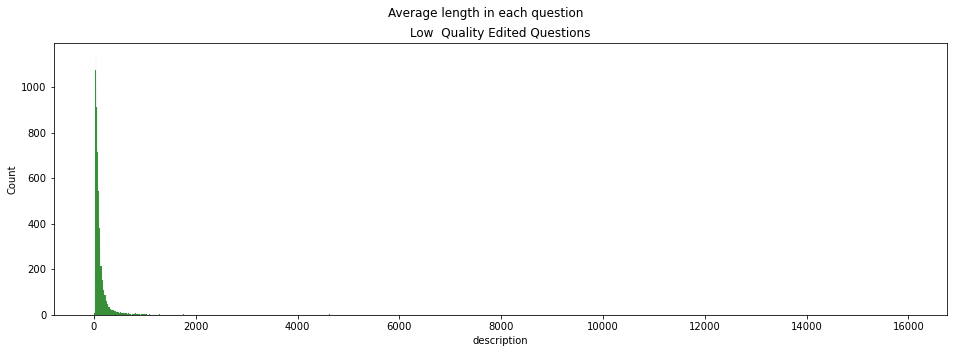

In [23]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[train['Y'] == 'LQ_EDIT']['description'].str.split().apply(len)
sns.histplot(word,ax  =  ax1, color = 'green')
ax1.set_title('Low  Quality Edited Questions')
fig.suptitle('Average length in each question')

Text(0.5, 0.98, 'Average length in each question')

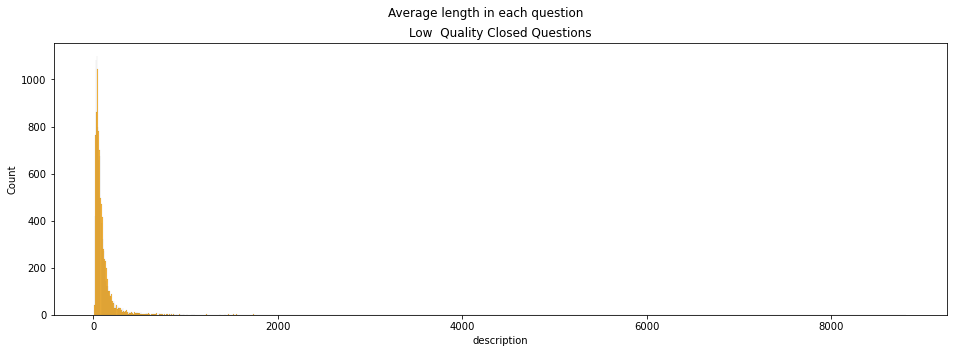

In [24]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[train['Y'] == 'LQ_CLOSE']['description'].str.split().apply(len)
sns.histplot(word,ax  =  ax1, color = 'orange')
ax1.set_title('Low  Quality Closed Questions')
fig.suptitle('Average length in each question')

Para los dos casos, las distribuciones no difieren enormemente entre las distintas categorías. Lo que si se debe notar es que al analizar el largo de los post, existen algunos de cercanos 16000 palabras, que aunque no se vean en el gráfico claramente, los límites del gráfico indican la existencia de un valor en el rango mostrado.

# Tarea n° 3: Generación y análisis de modelos

Se realizará la generación de 3 modelos con la intención de seleccionar el mejor para realizar su análisis. Además, para simplificar el problema se predecirá entre los post HQ (categoría 0) y LQ (categoría 1).

In [2]:
%load_ext tensorboard

import tensorflow as tf


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import text
from sklearn.metrics import classification_report
import keras

from tqdm.notebook import tqdm
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.style import set_palette
from yellowbrick.text import FreqDistVisualizer
import datetime

## 1ra opción

Parámetros seleccionados del problema.

In [16]:
EPOCHS = 3
BATCH_SIZE = 24
MAX_FEATURES = 20000
MAX_LEN = 100

En primera instancia se cargan los datos y se realiza el pre-procesado, donde se elimina los stop words y se reemplaza ciertos carácteres.

In [40]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')

train = clean_dataset(train)
valid = clean_dataset(valid)



Se separan los datos de entrenamiento y validación (o testeo) y se maneja las variable a predecir al transformarse en una variable categórica y de un tamaño adecuado para el modelo.

In [41]:
targets = {'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 1}
train['Y'] = train['Y'].map(targets)
valid['Y'] = valid['Y'].map(targets)

encoder = LabelEncoder()
encoder.fit(train.Y.values)
encoded_Y_train = encoder.transform(train.Y.values)
encoded_Y_valid = encoder.transform(valid.Y.values)

x_train = train.description.values
x_valid = valid.description.values

y_train = np_utils.to_categorical(encoded_Y_train)
y_valid = np_utils.to_categorical(encoded_Y_valid)



Se utiliza el tokenizador de keras y se tokenizan los set de datos.

In [42]:
tokens=text.Tokenizer(num_words=MAX_FEATURES, lower=True)
tokens.fit_on_texts(list(x_train))

In [43]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokens, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [20]:
x_train=tokens.texts_to_sequences(x_train)
x_valid=tokens.texts_to_sequences(x_valid)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_valid = tf.keras.preprocessing.sequence.pad_sequences(x_valid, maxlen=MAX_LEN)

Se crea la red neuronal. En este caso implica una capa de embedding y luego dos capas bidireccionales LSTM de 64 neuronas. Luego los resultados se aplanan, se agrega una capa de dropout y una capa predictora con la función de activación Softmax.

In [21]:
inputs = tf.keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(MAX_FEATURES, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 258   

En este trabajo se utilizó tensorboard para obtener un gráfico simple de las capas utilizadas. Al final del entrenamiento se cargará y se visualizará.

In [22]:
logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

Se utiliza el optimizador Adam y función de pérdida categorical_crossentropy, que aunque el problema sea binario, por como se creó la estructura de los tensores es necesario está función de pérdida. Finalmente se realiza el seguimiento de la métrica accuracy.

In [23]:
optim=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=optim,metrics=['accuracy'])

Se realiza el entrenamiento con los parámetros ya seleccionados.

In [24]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    validation_data=(x_valid, y_valid), 
                    callbacks=[tensorboard_callback],
                    verbose=1)

Epoch 1/3
1875/1875 [==============================] - 92s 46ms/step - loss: 0.4105 - accuracy: 0.8173 - val_loss: 0.3230 - val_accuracy: 0.8579
Epoch 2/3
1875/1875 [==============================] - 84s 45ms/step - loss: 0.3002 - accuracy: 0.8753 - val_loss: 0.2889 - val_accuracy: 0.8775
Epoch 3/3
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2831 - accuracy: 0.8844 - val_loss: 0.3009 - val_accuracy: 0.8720


In [25]:
model.save('my_model.h5')

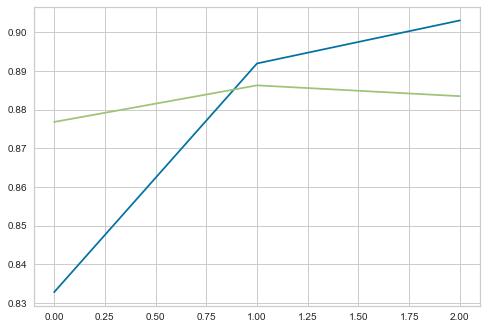

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

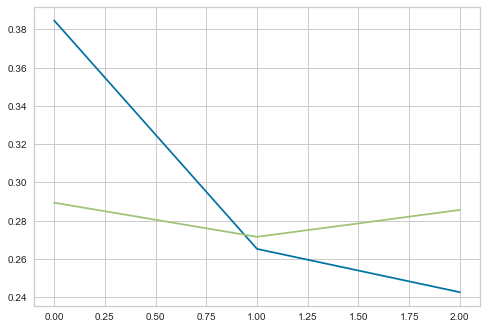

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [20]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12320), started 0:14:01 ago. (Use '!kill 12320' to kill it.)

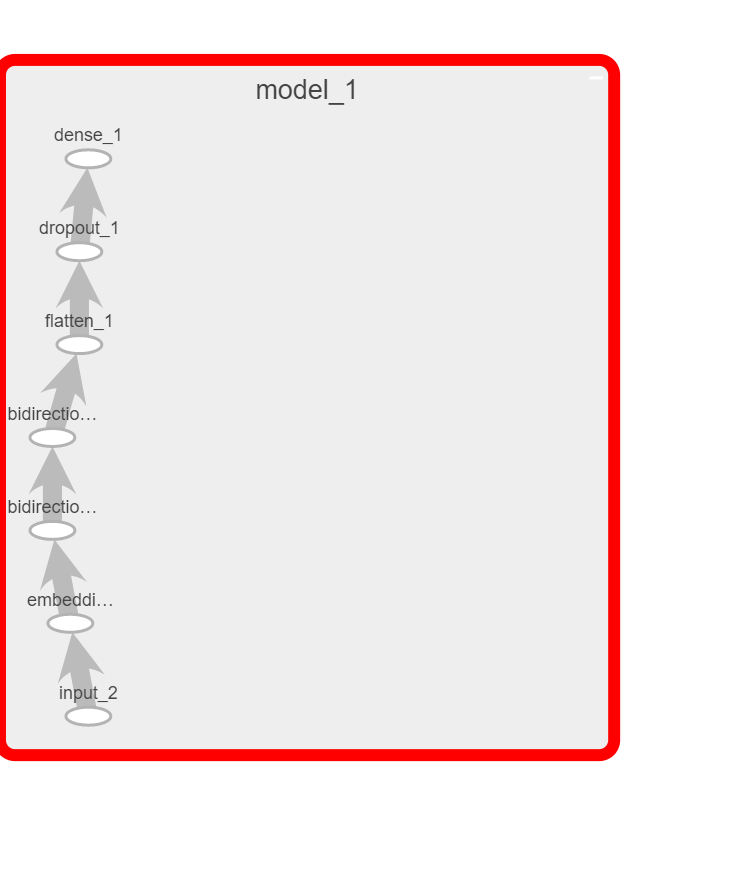

Con tensorboard se visualiza el grafo computacional (Abrir en una nueva pestaña para visualizar mejor)

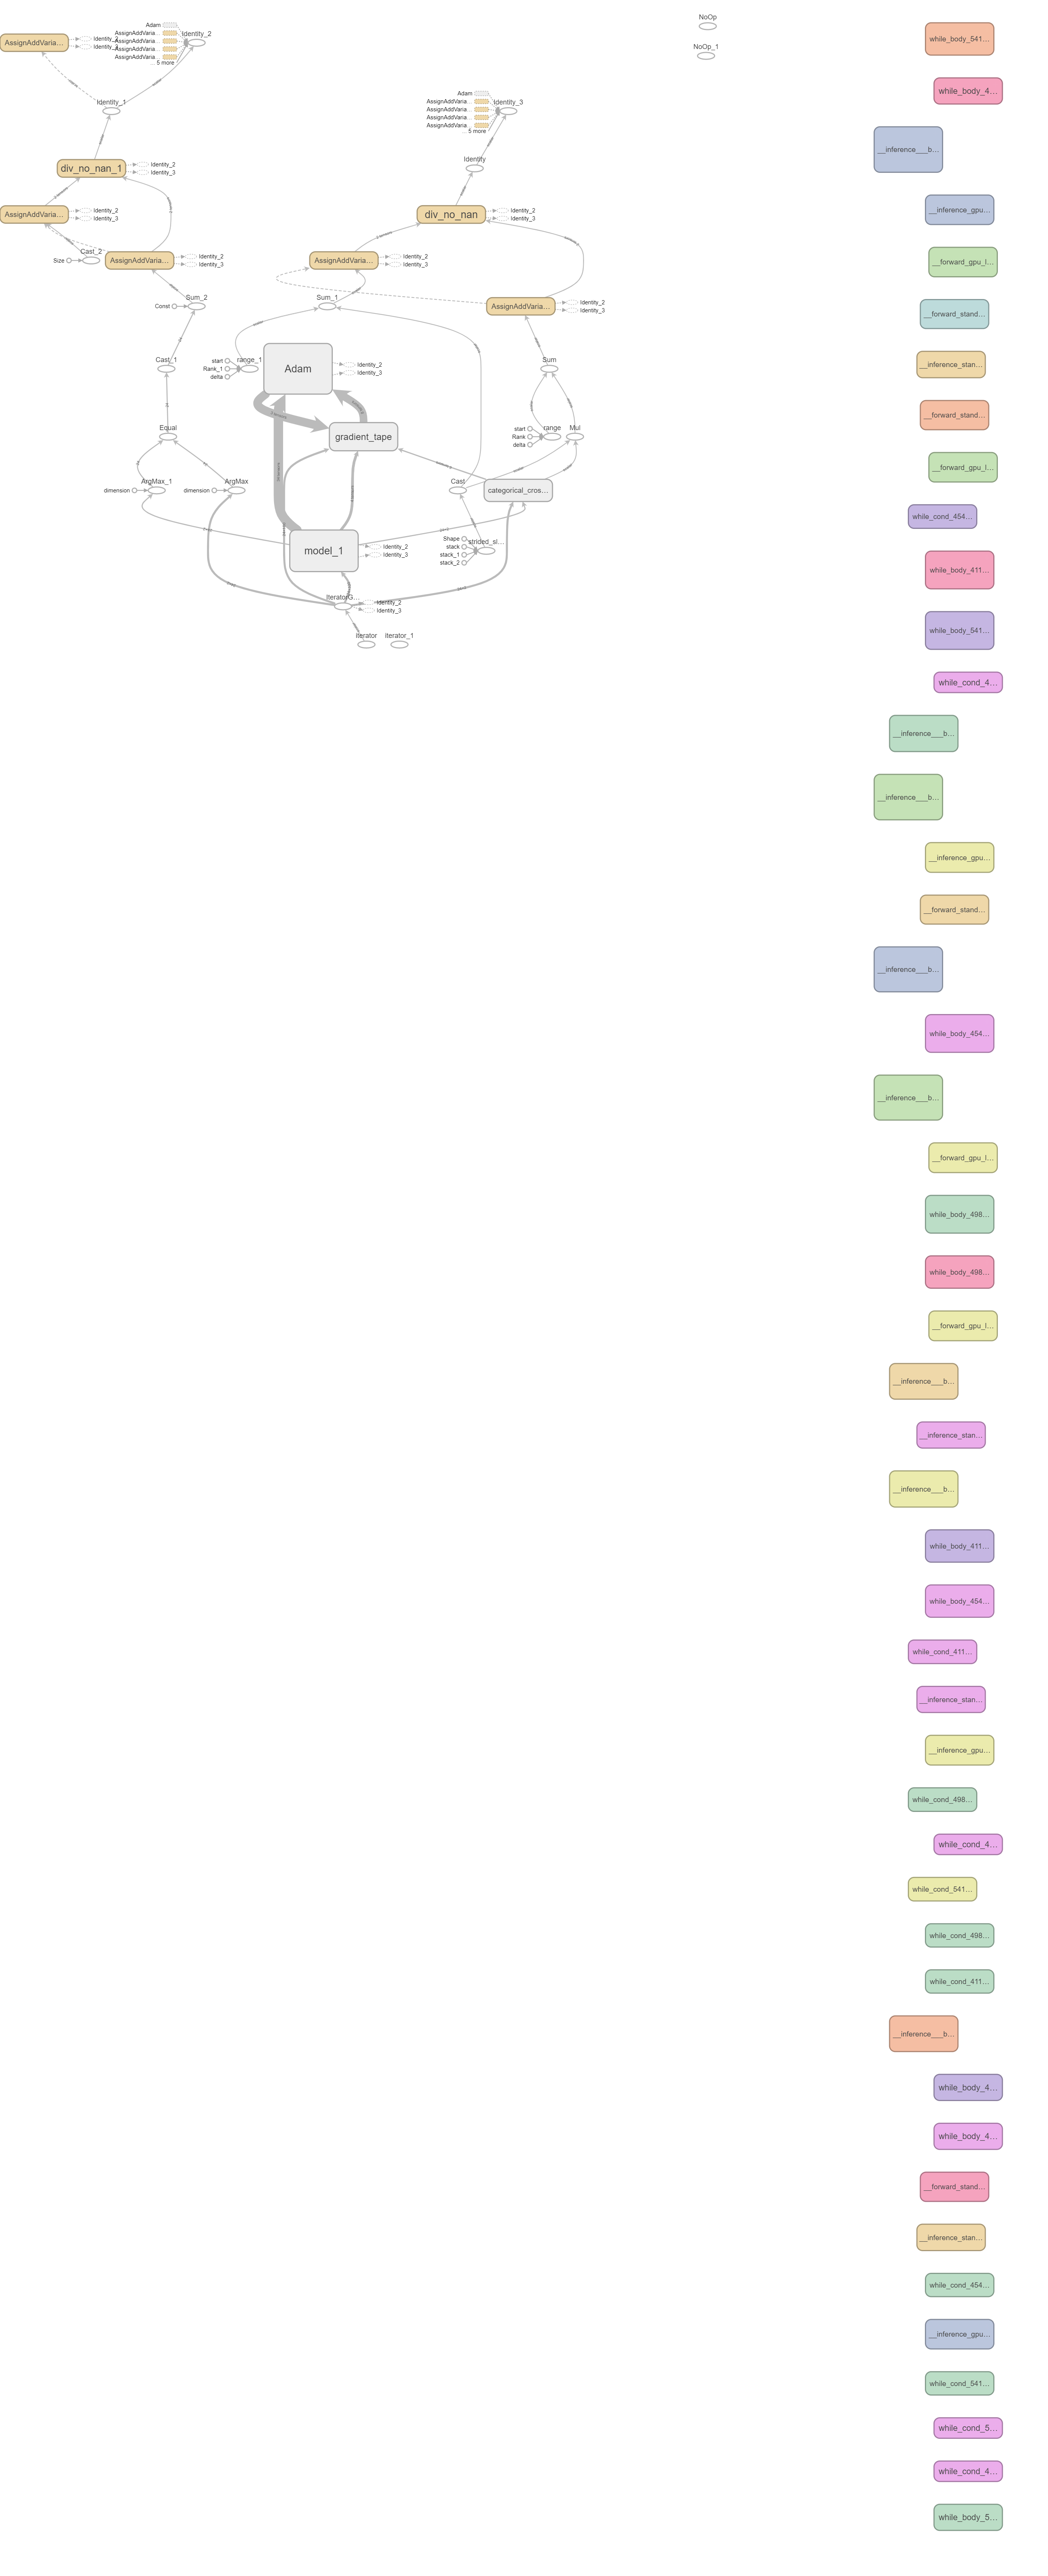

Finalmente se realizan las predicciones para analizar las métricas de evaluación.

In [21]:
y_pred=model.predict(x_valid)
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_valid,axis=1)

In [22]:
target_names = list(encoder.classes_)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      5000
           1       0.92      0.91      0.91     10000

    accuracy                           0.88     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.88      0.88      0.88     15000



Utilizando el modelo propuesto se obtuvo un accuracy de 0.88 y un valor F1 para la categoría HQ de 0.83 y para la categoría LQ de 0.91. Estos son valores relativamente altos, pero se intentarán mejorar al utilizar una segunda opción, que se presentará a continuación.

## 2da opción

Este método se utilizó como segunda opción. En este caso se utilizó la librería transformers de Huggingface. Se utiliza el tokenizador de Bert y la capa de transformers utilizada por este modelo.

Según explican en su repositorio, BERT es un modelo propuesto ya entrenado que utiliza una capa bidireccional de transformers.


In [1]:
import numpy as np    
import pandas as pd
import os
import re
import torch
import warnings
warnings.filterwarnings('ignore')

#The transformer library comes preinstalled in kaggle notebooks.
from transformers import AutoTokenizer, TFBertModel

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [4]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')

train = clean_dataset(train)
valid = clean_dataset(valid)

targets = {'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 1}
train['Y'] = train['Y'].map(targets)
valid['Y'] = valid['Y'].map(targets)

X_train = train["description"]
X_test= valid["description"]
y_train= train["Y"]
y_test= valid["Y"]

Se carga el tokenizador utilizando de base el modelo bert. Además se carga la capa de transformers.

In [5]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [6]:
bert = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [7]:
x_train = tokenizer(
    text=train.description.tolist(),
    add_special_tokens=True,
    max_length=32,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

El modelo incluye la capa bert, además de varias capas de Dropout y capas densas para realizar la predicción. La configuración utilizada es la siguiente.

In [33]:
max_len = 32

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

embeddings = bert(input_ids,attention_mask = input_mask)[1] 

out = tf.keras.layers.Dropout(0.1)(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)

y = Dense(1,activation = 'sigmoid')(out)
    
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [34]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 32)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 32)]         0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   multiple             109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_78 (Dropout)            (None, 768)          0           tf_bert_model_1[1][1]      

In [35]:
optimizer = Adam(
    learning_rate=6e-06, # this learning rate is taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = BinaryCrossentropy(from_logits = True)
metric = BinaryAccuracy('accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [36]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
   epochs=12,
    batch_size=32
)

Epoch 1/12
1407/1407 [==============================] - 505s 343ms/step - loss: 0.4690 - accuracy: 0.7789
Epoch 2/12
1407/1407 [==============================] - 475s 337ms/step - loss: 0.4065 - accuracy: 0.8202
Epoch 3/12
1407/1407 [==============================] - 475s 338ms/step - loss: 0.3930 - accuracy: 0.8278
Epoch 4/12
1407/1407 [==============================] - 475s 338ms/step - loss: 0.3867 - accuracy: 0.8316
Epoch 5/12
1407/1407 [==============================] - 476s 338ms/step - loss: 0.3810 - accuracy: 0.8338
Epoch 6/12
1407/1407 [==============================] - 477s 339ms/step - loss: 0.3762 - accuracy: 0.8371
Epoch 7/12
1407/1407 [==============================] - 476s 338ms/step - loss: 0.3740 - accuracy: 0.8369
Epoch 8/12
1407/1407 [==============================] - 475s 337ms/step - loss: 0.3705 - accuracy: 0.8397
Epoch 9/12
1407/1407 [==============================] - 477s 339ms/step - loss: 0.3680 - accuracy: 0.8414
Epoch 10/12
1407/1407 [=======================

In [37]:
x_test = tokenizer(
    text=valid.description.tolist(),
    add_special_tokens=True,
    max_length=32,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [38]:
predicted = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})

In [39]:
y_predicted = np.where(predicted>0.5,1,0)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted.reshape(-1)))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5000
           1       0.88      0.90      0.89     10000

    accuracy                           0.85     15000
   macro avg       0.83      0.82      0.83     15000
weighted avg       0.85      0.85      0.85     15000



Los resultados no fueron tan buenos como la capa bidireccional de LSTM, se probará cambiar y utilizar la configuración de capas densas analizadas anteriormente.

## 3ra opción

In [11]:
max_len = 32

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

embeddings = bert(input_ids,attention_mask = input_mask)[1] 
out = layers.Flatten()(embeddings)
out = layers.Dropout(0.5)(out)
y = Dense(1,activation = 'sigmoid')(out)

    
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 32)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 32)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 768)          0           tf_bert_model[2][1]          

In [13]:
optimizer = Adam(
    learning_rate=6e-06, # this learning rate is taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = BinaryCrossentropy(from_logits = True)
metric = BinaryAccuracy('accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [14]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
   epochs=12,
    batch_size=32
)

Epoch 1/12
1407/1407 [==============================] - 528s 361ms/step - loss: 0.4924 - accuracy: 0.7637
Epoch 2/12
1407/1407 [==============================] - 504s 358ms/step - loss: 0.4257 - accuracy: 0.8100
Epoch 3/12
1407/1407 [==============================] - 489s 347ms/step - loss: 0.4119 - accuracy: 0.8158
Epoch 4/12
1407/1407 [==============================] - 476s 338ms/step - loss: 0.4019 - accuracy: 0.8210
Epoch 5/12
1407/1407 [==============================] - 470s 334ms/step - loss: 0.3959 - accuracy: 0.8255
Epoch 6/12
1407/1407 [==============================] - 470s 334ms/step - loss: 0.3922 - accuracy: 0.8260
Epoch 7/12
1407/1407 [==============================] - 470s 334ms/step - loss: 0.3882 - accuracy: 0.8295
Epoch 8/12
1407/1407 [==============================] - 474s 337ms/step - loss: 0.3837 - accuracy: 0.8313
Epoch 9/12
1407/1407 [==============================] - 481s 342ms/step - loss: 0.3831 - accuracy: 0.8321
Epoch 10/12
1407/1407 [=======================

In [15]:
x_test = tokenizer(
    text=valid.description.tolist(),
    add_special_tokens=True,
    max_length=32,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [16]:
predicted = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})

In [17]:
y_predicted = np.where(predicted>0.5,1,0)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted.reshape(-1)))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      5000
           1       0.87      0.90      0.88     10000

    accuracy                           0.84     15000
   macro avg       0.83      0.82      0.82     15000
weighted avg       0.84      0.84      0.84     15000



# Análisis del modelo

Los mejores resultados fueron obtenidos con el primer modelo. Por esta razón se realizará el análisis respecto a este este. El análisis consistirá en tres partes:

* Análisis de predicciones según el tipo de lenguaje
* Análisis de predicciones según el largo del post
* Análisis de predicciones según la promedio de palabras distintas (Se cuenta la repetición de cada palabra y se promedia)

In [13]:
#Se carga el modelo creado
new_model = tf.keras.models.load_model('my_model.h5')
MAX_LEN = 100

In [7]:
#Se carga el set de validación y se limpia
valid = pd.read_csv('valid.csv')
valid["Tags"] = valid['Tags'].str.replace('<','')
valid["Tags"] = valid['Tags'].str.replace('>',' ')
valid = clean_dataset(valid)
valid

,Id,Title,Body,Tags,CreationDate,Y,description
0,34552974,to get the child records different tables base...,am would different tables like select system s...,sql sql-server,2016-01-01 01:44:52,LQ_EDIT,to get the child records different tables base...
1,34554721,retrieve except data the another table,have two table m_master tbl_appointment is tbl...,php mysql sql codeigniter mysqli,2016-01-01 08:43:50,LQ_EDIT,retrieve except data the another table have tw...
2,34555135,pandas read_html,trying extract us states wiki url for m using ...,python pandas,2016-01-01 09:55:22,HQ,pandas read_html trying extract us states wiki...
3,34555448,reader always gimme null,so new i wanna make application can easily con...,sql-server c#-4.0,2016-01-01 10:43:45,LQ_EDIT,reader always gimme null so new i wanna make a...
4,34555752,php rearrange array elements based condition,basically array array would would would would ...,php,2016-01-01 11:34:09,LQ_EDIT,php rearrange array elements based condition b...
...,...,...,...,...,...,...,...
14995,60465681,can align two flex boxes follow other,have menu d like div right controls in theory ...,html css flexbox,2020-02-29 13:32:56,LQ_CLOSE,can align two flex boxes follow other have men...
14996,60467932,c correct way multiply integer double,try multiply integer double obtain wrong resul...,c++,2020-02-29 17:46:41,LQ_CLOSE,c correct way multiply integer double try mult...
14997,60468378,django showing this error try open new page hy...,urls py urls py file django contrib import adm...,django django-views django-templates,2020-02-29 18:35:39,LQ_EDIT,django showing this error try open new page hy...
14998,60469392,php getting content php page,have controller inside server connected networ...,javascript php html,2020-02-29 20:32:14,LQ_CLOSE,php getting content php page have controller i...


In [8]:
#De la columna Tags se obtiene la primera palabra que es el lenguaje computacional utilizado
flat_list = []
for sublist in np.array(valid["Tags"]):
    flat_list.append(sublist.split()[0])
valid["Languaje"] = flat_list

In [10]:
#Se reemplazan la variable a predecir por 0 (HQ) y 1 (LQ)
targets = {'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 1}
valid['Y'] = valid['Y'].map(targets)

In [11]:
#Se carga el tokenizador
import pickle

with open('tokenizer.pickle', 'rb') as handle:
    tokens = pickle.load(handle)

In [14]:
#Se tokenizan las palabras
x_valid = valid.description.values
x_valid= tokens.texts_to_sequences(x_valid)
x_valid = tf.keras.preprocessing.sequence.pad_sequences(x_valid, maxlen=MAX_LEN)

In [15]:
#Se obtienen las predicciones
y_pred=new_model.predict(x_valid)
y_pred=np.argmax(y_pred,axis=1)
valid["Y_pred"] = y_pred
valid["Is_correct"] = valid["Y_pred"] == valid["Y"]

In [16]:
#Se obtiene la métrica general del modelo
y_true = valid.Y.values
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      5000
           1       0.91      0.89      0.90     10000

    accuracy                           0.87     15000
   macro avg       0.85      0.86      0.86     15000
weighted avg       0.87      0.87      0.87     15000



El promedio de la métrica F1 es 0.855

Para este modelo la métrica general fue de 0.87. Ahora la pregunta es ¿Como actuaron los diferentes grupos dentro de nuestra predicción? ¿Las métricas son parecidas entre los distintos niveles?.

Este análisis se realiza a continuación:

## Análisis por lenguaje

Dentro de las predicciones se busca que las métricas sean parecidas para los distintos grupos. Al final de este procedimiento se mostrarán los gráficos de las métricas para los distintos lenguajes.

In [65]:
#Se obtienen las métricas accuracy y F1 para los distintos lenguajes

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

uniques, count = np.unique(valid["Languaje"], return_counts = True)
accuracy = []
f1 = []
for i in uniques:
    dat_acc = valid[valid.Languaje == i]
    accuracy.append(accuracy_score(dat_acc["Y"], dat_acc["Y_pred"]))
    f1.append(f1_score(dat_acc["Y"], dat_acc["Y_pred"]))

C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to 

C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to 

C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to 

C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to 

C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to 

C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\alejo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to 

In [66]:
#Se crea un dataframe con los lenguajes y las métricas. 
#Existen métricas F1 = 0 debido no sabe como calcular exacta esta métrica.
dataframe_languaje = pd.DataFrame({"Languaje":uniques, "count":count, "accuracy":accuracy, "F1":f1})
dataframe_languaje

,Languaje,count,accuracy,F1
0,.htaccess,3,1.00,1.000000
1,.net,12,0.75,0.727273
2,.net-core,8,1.00,0.000000
3,accessibility,1,0.00,0.000000
4,actionscript-3,2,1.00,1.000000
...,...,...,...,...
729,xmpp,1,1.00,1.000000
730,youtube,1,1.00,0.000000
731,yum,1,1.00,0.000000
732,zip,1,0.00,0.000000


In [67]:
#Se selecciona los lenguajes que tienen más de 100 post para poder graficarlos.
dataframe_languaje_top = dataframe_languaje[dataframe_languaje["count"] > 100]
dataframe_languaje_top

,Languaje,count,accuracy,F1
25,android,903,0.859358,0.882298
35,angular,294,0.863946,0.629630
99,c,416,0.935096,0.965605
100,c#,1000,0.873000,0.920675
101,c++,716,0.857542,0.906422
145,css,103,0.815534,0.857143
299,html,280,0.882143,0.929336
326,ios,424,0.853774,0.855814
332,java,1554,0.900257,0.938370
337,javascript,1721,0.875654,0.912223


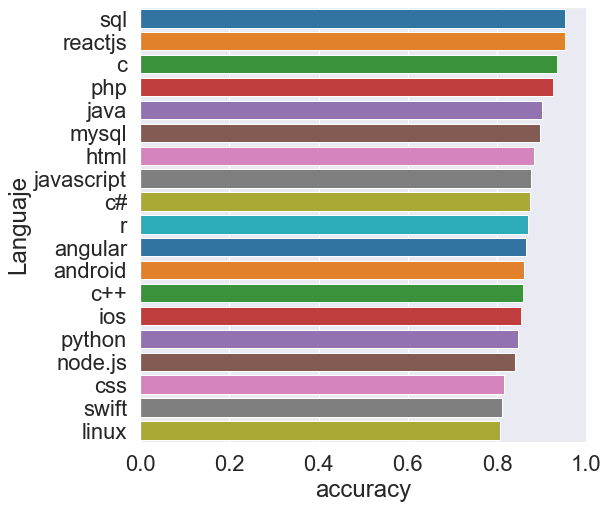

In [107]:
import seaborn as sns
plt.figure(figsize =(8,8))
sns.barplot(y="Languaje", x="accuracy", data=dataframe_languaje_top.sort_values("accuracy", ascending=False), palette ="tab10")
sns.set(font_scale = 2)

<AxesSubplot:xlabel='F1', ylabel='Languaje'>

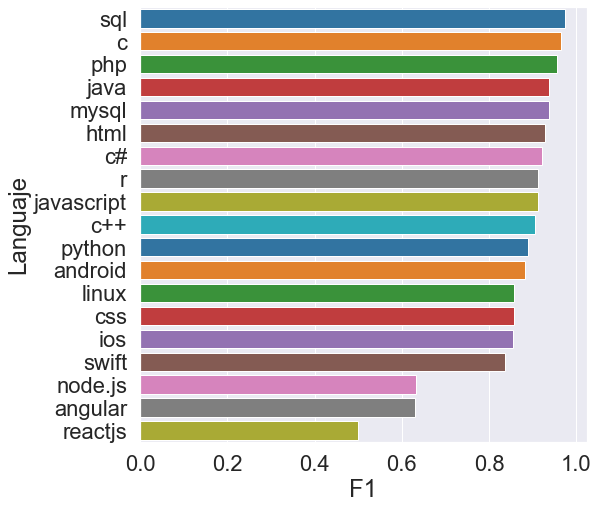

In [108]:
plt.figure(figsize =(8,8))
sns.barplot(y="Languaje", x="F1", data=dataframe_languaje_top.sort_values("F1", ascending=False), palette ="tab10")

La métrica accuracy es sobre 0.8 para todos los lenguajes, pero la métrica  F1 tiene mala performance para ciertos lenguajes como reactjs, angular y node.js. 

## Análisis por largo de post

El procedimiento es similar al anterior, pero ahora no es el lenguaje sino que el largo de los post. Como existe un gran rango para el largo de post se separó en deciles y se realizó la comparación.

In [109]:
word  =  valid['description'].str.split().apply(len)

In [110]:
valid["longpost"] = word
valid['quantile'] = pd.qcut(valid['longpost'], 10, labels=False)

In [111]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

uniques, count = np.unique(valid["quantile"], return_counts = True)
accuracy = []
f1 = []
for i in uniques:
    dat_acc = valid[valid["quantile"] == i]
    accuracy.append(accuracy_score(dat_acc["Y"], dat_acc["Y_pred"]))
    f1.append(f1_score(dat_acc["Y"], dat_acc["Y_pred"]))

In [112]:
valid

,Id,Title,Body,Tags,CreationDate,Y,description,Languaje,Y_pred,Is_correct,longpost,quantile,longwords,quantile_words
0,34552974,to get the child records different tables base...,am would different tables like select system s...,sql sql-server,2016-01-01 01:44:52,1,to get the child records different tables base...,sql,0,False,72,4,4.541667,0
1,34554721,retrieve except data the another table,have two table m_master tbl_appointment is tbl...,php mysql sql codeigniter mysqli,2016-01-01 08:43:50,1,retrieve except data the another table have tw...,php,1,True,34,1,5.264706,2
2,34555135,pandas read_html,trying extract us states wiki url for m using ...,python pandas,2016-01-01 09:55:22,0,pandas read_html trying extract us states wiki...,python,0,True,125,7,5.680000,2
3,34555448,reader always gimme null,so new i wanna make application can easily con...,sql-server c#-4.0,2016-01-01 10:43:45,1,reader always gimme null so new i wanna make a...,sql-server,1,True,105,6,6.561905,3
4,34555752,php rearrange array elements based condition,basically array array would would would would ...,php,2016-01-01 11:34:09,1,php rearrange array elements based condition b...,php,1,True,317,9,4.870662,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,60465681,can align two flex boxes follow other,have menu d like div right controls in theory ...,html css flexbox,2020-02-29 13:32:56,1,can align two flex boxes follow other have men...,html,1,True,116,6,4.560345,0
14996,60467932,c correct way multiply integer double,try multiply integer double obtain wrong resul...,c++,2020-02-29 17:46:41,1,c correct way multiply integer double try mult...,c++,1,True,175,8,4.594286,0
14997,60468378,django showing this error try open new page hy...,urls py urls py file django contrib import adm...,django django-views django-templates,2020-02-29 18:35:39,1,django showing this error try open new page hy...,django,1,True,157,8,5.388535,2
14998,60469392,php getting content php page,have controller inside server connected networ...,javascript php html,2020-02-29 20:32:14,1,php getting content php page have controller i...,javascript,1,True,169,8,4.656805,0


In [122]:
maxx = valid.groupby("quantile").max().longpost.values

In [123]:
minn = valid.groupby("quantile").min().longpost.values

In [124]:
ranges = []
for i in range(10):
    ranges.append(f"[{minn[i]} - {maxx[i]}]")
ranges

['[6 - 31]',
 '[32 - 41]',
 '[42 - 51]',
 '[52 - 63]',
 '[64 - 77]',
 '[78 - 95]',
 '[96 - 118]',
 '[119 - 156]',
 '[157 - 238]',
 '[239 - 10337]']

In [127]:
dataframe_longpost = pd.DataFrame({"ranges":ranges, "count":count, "accuracy":accuracy, "F1":f1})
dataframe_longpost

,ranges,count,accuracy,F1
0,[6 - 31],1620,0.875926,0.926347
1,[32 - 41],1491,0.881958,0.927750
2,[42 - 51],1437,0.874739,0.919137
3,[52 - 63],1477,0.876100,0.912732
4,[64 - 77],1528,0.869764,0.903445
5,[78 - 95],1510,0.893377,0.913580
6,[96 - 118],1449,0.876467,0.889710
7,[119 - 156],1491,0.857143,0.860875
8,[157 - 238],1501,0.867422,0.871197
9,[239 - 10337],1496,0.846925,0.862297


<AxesSubplot:xlabel='accuracy', ylabel='ranges'>

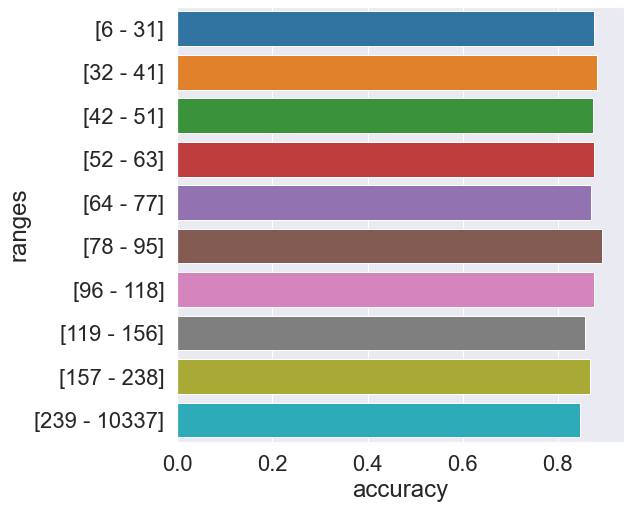

In [128]:
plt.figure(figsize =(8,8))
sns.barplot(y="ranges", x="accuracy", data=dataframe_longpost, palette ="tab10")


<AxesSubplot:xlabel='F1', ylabel='ranges'>

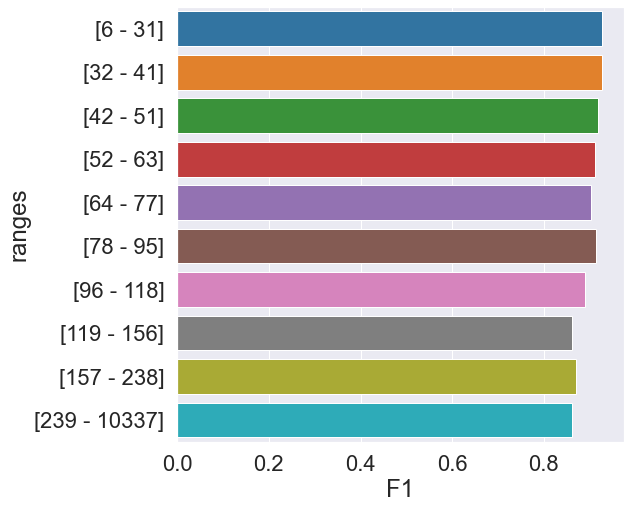

In [129]:
plt.figure(figsize =(8,8))
sns.barplot(y="ranges", x="F1", data=dataframe_longpost, palette ="tab10")


En este caso no parece existir una gran diferencia entre los distintos deciles.

## Análisis por tipos de palabras

Similar al análisis anterior, pero ahora se realiza el análisis de predicciones según la promedio de palabras distintas (Se cuenta la repetición de cada palabra y se promedia), en este caso se separará por cuartiles.

In [52]:
word2  =  valid['description'].str.split().apply(lambda x : np.mean([len(i) for i in x]))
valid["longwords"] = word2
valid['quantile_words'] = pd.qcut(valid['longwords'], 4, labels=False)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

uniques, count = np.unique(valid["quantile_words"], return_counts = True)
accuracy = []
f1 = []
for i in uniques:
    dat_acc = valid[valid["quantile_words"] == i]
    accuracy.append(accuracy_score(dat_acc["Y"], dat_acc["Y_pred"]))
    f1.append(f1_score(dat_acc["Y"], dat_acc["Y_pred"]))

In [37]:
valid.head()

,Id,Title,Body,Tags,CreationDate,Y,description,Languaje,Y_pred,Is_correct,longpost,quantile,longwords,quantile_words
0,34552974,to get the child records different tables base...,am would different tables like select system s...,sql sql-server,2016-01-01 01:44:52,1,to get the child records different tables base...,sql,0,False,72,4,4.541667,0
1,34554721,retrieve except data the another table,have two table m_master tbl_appointment is tbl...,php mysql sql codeigniter mysqli,2016-01-01 08:43:50,1,retrieve except data the another table have tw...,php,1,True,34,1,5.264706,2
2,34555135,pandas read_html,trying extract us states wiki url for m using ...,python pandas,2016-01-01 09:55:22,0,pandas read_html trying extract us states wiki...,python,0,True,125,7,5.680000,2
3,34555448,reader always gimme null,so new i wanna make application can easily con...,sql-server c#-4.0,2016-01-01 10:43:45,1,reader always gimme null so new i wanna make a...,sql-server,1,True,105,6,6.561905,3
4,34555752,php rearrange array elements based condition,basically array array would would would would ...,php,2016-01-01 11:34:09,1,php rearrange array elements based condition b...,php,1,True,317,9,4.870662,0


In [58]:
maxx = np.round(valid.groupby("quantile_words").max().longwords.values, 3)

In [59]:
minn = np.round(valid.groupby("quantile_words").min().longwords.values, 3)

In [60]:
ranges = []
for i in range(4):
    ranges.append(f"[{minn[i]} - {maxx[i]}]")
ranges

['[2.645 - 4.905]', '[4.905 - 5.253]', '[5.254 - 5.688]', '[5.688 - 40.493]']

In [64]:
dataframe_word = pd.DataFrame({"ranges":ranges, "count":count, "accuracy":accuracy, "F1":f1})
dataframe_word

,ranges,count,accuracy,F1
0,[2.645 - 4.905],3752,0.868603,0.912480
1,[4.905 - 5.253],3748,0.874867,0.905424
2,[5.254 - 5.688],3753,0.872902,0.897353
3,[5.688 - 40.493],3747,0.871631,0.893936


<AxesSubplot:xlabel='accuracy', ylabel='ranges'>

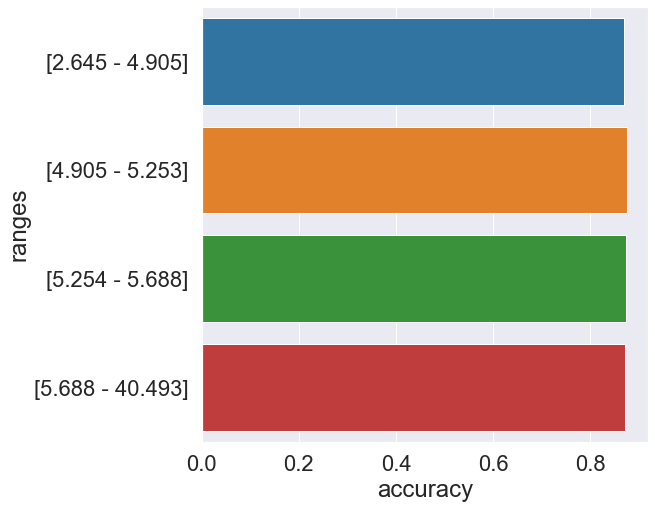

In [130]:
plt.figure(figsize =(8,8))
sns.barplot(y="ranges", x="accuracy", data=dataframe_word, palette ="tab10")

<AxesSubplot:xlabel='F1', ylabel='ranges'>

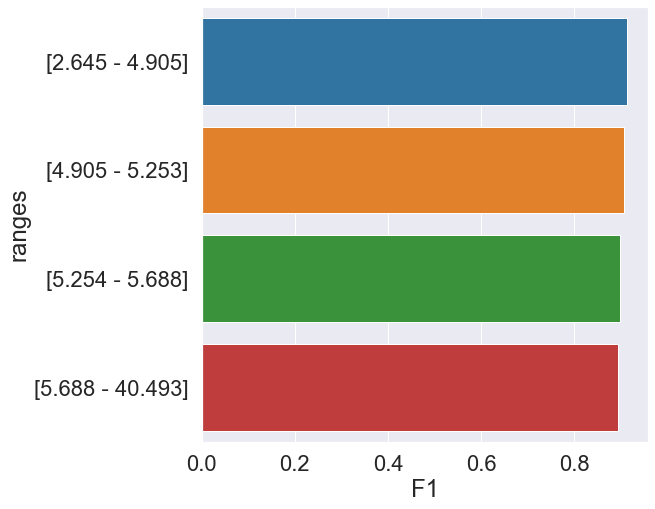

In [131]:
plt.figure(figsize =(8,8))
sns.barplot(y="ranges", x="F1", data=dataframe_word, palette ="tab10")

Nuevamente no existe una gran diferencia entre las métricas.

# Conclusión

Se logró generar un modelo que predijera clasificaciones binarias a partir de post de stack overflow. Se generaron tres modelos, de los cuales el más simple fue el mejor y consistía en 2 capas LSTM bidireccionales. Además, comparativamente utilizaba menos cantidad de parámetros que una utilizando una capa pre-entrenada de transformers BERT.

Para el mejor modelo se obtuvieron métricas generales de 0.87 de accuracy y 0.855. Si se analizan las predicciones entre los distintos grupos, como pueden ser post dedicados a cierto lenguaje, o post muy largos, o muy cortos, las predicciones en general fue justa entre los distintos grupos analizados:

* La métrica accuracy es similar entre los distintos lenguajes con más de 100 post, pero la métrica F1 desciende para ciertos lenguajes.
* Las métricas accuracy y F! son similares al comparar distintos largos de post.
* Las métricas accuracy y F! son similares al comparar utilización de palabras en el post.

Con estos resultados se puede concluir, que aunque las métricas no sean tan altas, genera buenas predicciones. Además, no discrimina por las distintas características del post y al parecer logra captar el contenido y la forma en que este está escrito al considerar las dos capas bidireccionales LSTM.